In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn  import metrics#roc_curve, auc

# Import own libraries with custom technical routines and own implementation of logistic regression
from custom_routines import custom_routines as cr
from logisticReg import logistic_regression

# Import Naive Bayes classifiers from sci-kit learn
from sklearn.naive_bayes import MultinomialNB, GaussianNB

 Arriba cargamos las librerías que usaremos a lo largo de ambos problemas en este ejercicio. Novedad es el paquete sklearn que usaremos para la graficación de curvas ROC y el cálculo del área bajo la curva. La librería custom_routines fue implementada solamente usando numpy y su contenido se encuentra en custom_routines.py. Nuestra implementación de la regresión logística está en logisticReg.py. Ahí puede ver el código de los métodos propios del entrenamiento de dicho tipo de modelos, y en particular ahí puede consultar el algoritmo de descenso de gradiente empleado para minimizar la función de pérdida. 

## 1. Clasificación de spam

Como es natural, iniciamos por cargar los datos del problema. En seguida hacemos una partición aleatoria de los datos en un conjunto de entrenamiento y otro de validación (en proporción 70%--30%).

In [2]:
spam_data = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/spam.csv", header=None, delimiter=" ").values

#Partición aleatoria del conjunto de datos, 70% para entrenamiento y 30% para validación
train_spam_data, test_spam_data = train_test_split(spam_data, test_size=0.30, random_state=0)
print("Número de instancias para entrenamiento: ", len(train_spam_data))
print("Número de instancuas para validación:", len(test_spam_data))

Número de instancias para entrenamiento:  3620
Número de instancuas para validación: 1552


### 1. a) Entrenamiento de un clasificador Bayes ingenuo
Sabemos que un buen modelo para la clasificación de spam es aquel que asume una distribución multinomial en las variables independientes. Por lo tanto, entrenamos el clasificador MultinomialNB de sci-kit learn. Imprimimos los coeficientes de rendimiento (scores) del clasificador sobre los conjuntos de entrenamiento y validación. Estos coeficientes se calculan como: 
$$score = \frac{\text{número de instancias clasificadas correctamente}}{\text{número total de instancias}}$$
Entre más cercano a 1 es este valor, mejor es la clasificación del modelo.

In [3]:
# Entrenamiento de clasificador de MultinomialNB
multinomial_classifier = MultinomialNB()
multinomial_classifier.fit(train_spam_data[0:,:-1], train_spam_data[0:,-1])

# Scores
print("Score de MultinomialNB sobre el conjunto de entrenamiento: ", multinomial_classifier.score(train_spam_data[0:,:-1], train_spam_data[0:,-1]))
print("Score de MultinomialNB sobre el conjunto de validación: ", multinomial_classifier.score(test_spam_data[0:,:-1], test_spam_data[0:,-1]))

Score de MultinomialNB sobre el conjunto de entrenamiento:  0.9541436464088398
Score de MultinomialNB sobre el conjunto de validación:  0.9478092783505154


A continuación hacemos los calculos necesarios para posteriormente graficar las curvas ROC y de precisión exhaustividad para Multinomial NB. Reportamos también el ára bajo la curva ROC. 

In [4]:
predicted_spam_nb = multinomial_classifier.predict_proba(test_spam_data[0:,:-1])

fpr_spam_nb, tpr_spam_nb, _ = metrics.roc_curve(test_spam_data[0:,-1],  predicted_spam_nb[0:,1])
auc_spam_nb = metrics.roc_auc_score(test_spam_data[0:,-1], predicted_spam_nb[0:,1])
print("El área bajo la curva ROC para MultinomialNB es =", auc_spam_nb)

El área bajo la curva ROC para MultinomialNB es = 0.9747578073904513


### 1. b) Entrenamiento de un clasificador por regresión logística
Ahora abordamos el problema de clasificar en spam o no spam por medio de una regresión logística. La implementación de logistic_regression() se encuentra en el archivo logisticReg.py. El método logistic_regression.fit toma como entrada a la tripleta $(X,y,\lambda)$, donde $X$ es la matriz con los datos de entrenamiento correspondiente a las variables independientes y $y$ es el vector con la etiquetas correctas correspondientes a cada renglón de $X$. $\lambda$ es el factor de penalización $L_2$, el cual debería estar estar en $[0,0.5]$.

A continuación, como primer ejemplo, entrenamos el modelo con regresión logística con los datos de entrenamiento y sin penalización $L_2$, es decir, con $\lambda=0$. También presentamos los coeficientes de rendimiento (scores) del modelo. 

In [5]:
# Entrenar un modelo de regresión logística
logit_reg1 = logistic_regression()
logit_reg1.fit(train_spam_data[0:,:-1],train_spam_data[0:,-1], 0)

# Scores 
print("Score de logistic_regression sobre el conjunto de entrenamiento:", logit_reg1.score(train_spam_data[0:,:-1],train_spam_data[0:,-1]))
print("Score de logistic_regression sobre el conjunto de validación: ", logit_reg1.score(test_spam_data[0:,:-1],test_spam_data[0:,-1]))

Score de logistic_regression sobre el conjunto de entrenamiento: 0.9977900552486187
Score de logistic_regression sobre el conjunto de validación:  0.9664948453608248


A continuación exploramos el impacto de aplicar regularización $L_2$, calculando los scores para diferentes valores de $\lambda$. Posteriormente, resumimos esto en una gráfica. 

In [6]:
# Calcular scores para diferentes valores de lambda
lambds = np.concatenate((np.linspace(-0.01, 0.02, num=10),[0.05,0.08,0.1]))
i = 0
res_train = np.zeros(13)
res_test = np.zeros(13)

for lambd in lambds:
    logit_reg1.fit(train_spam_data[0:,:-1],train_spam_data[0:,-1], lambd)
    res_train[i] = logit_reg1.score(train_spam_data[0:,:-1],train_spam_data[0:,-1])
    res_test[i] = logit_reg1.score(test_spam_data[0:,:-1],test_spam_data[0:,-1])
    i += 1

Score máximo sobre conjunto de validación = 0.9664948453608248 , alcanzado para lambd = -1.734723475976807e-18


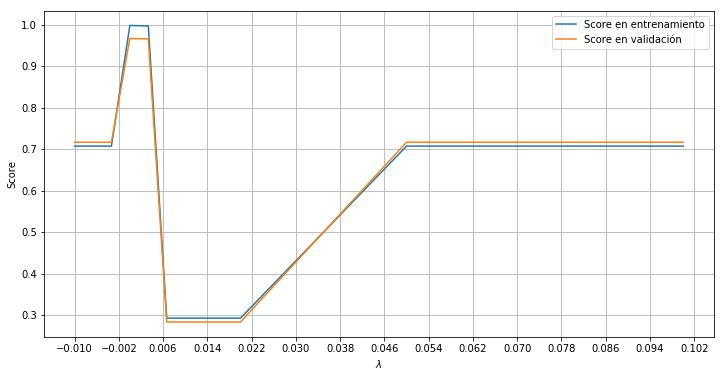

In [27]:
# Encontrar máximo score y lambda para el cual se alcanza
print("Score máximo sobre conjunto de validación =", res_test.max(), ", alcanzado para lambd =", lambds[res_test.argmax()])#, lambds[results[0:][1].argmin()]) 

#Graficar 
plt.figure(figsize=(12,6))
plt.plot(lambds, res_train, label = "Score en entrenamiento")
plt.plot(lambds, res_test, label = "Score en validación")
plt.xlabel("$\lambda$")
plt.ylabel("Score")
plt.legend(loc = "upper right")
plt.xticks(np.arange(-0.01, 0.11, .008))
plt.grid(True)
plt.show()

Podemos observar que para $\lambda$ aproximadamente mayor a 0.006 logistic_regression probablemente comienza a caer en inestabilidades númericas. 
La mejor región donde podemos tomar $\lambda$ es a partir de 0 y hasta aproximadamente 0.005 (con mejor $\lambda$ reportado como -1.734723475976807e-18). Por lo tanto, decidimos quedarnos con el modelo sin regularización. 

En seguida hacemos los calculos necesarios para posteriormente graficar las curvas ROC y de precisión exhaustividad para logistic_regression. Reportamos también el área bajo la curva ROC. 

In [8]:
chosen_spam_logit = logistic_regression()
chosen_spam_logit.fit(train_spam_data[0:,:-1],train_spam_data[0:,-1], 0)

In [9]:
# Etiquetas predichas por el modelo de regresión logística para el conjunto de validación
predicted_spam_logit = chosen_spam_logit.decision(test_spam_data[0:,:-1])

# Calculo de las proporciones de falsos-positivos y verdaderos-positivos
fpr_spam_logit, tpr_spam_logit, _ = metrics.roc_curve(test_spam_data[0:,-1],  predicted_spam_logit)
auc_spam_logit = metrics.roc_auc_score(test_spam_data[0:,-1], predicted_spam_logit)
print("El área bajo la curva ROC para logistic_regression es =", auc_spam_logit)

El área bajo la curva ROC para logistic_regression es = 0.9887017658600392


### 1. c) Gráficas de rendimiento para MultinomialNB y logistic_regression

Finalmente, ahora presentamos las curvas ROC y de precisión-exhaustividad para los modelos entrenados multinomial_classifier y chosen_model_logit. 

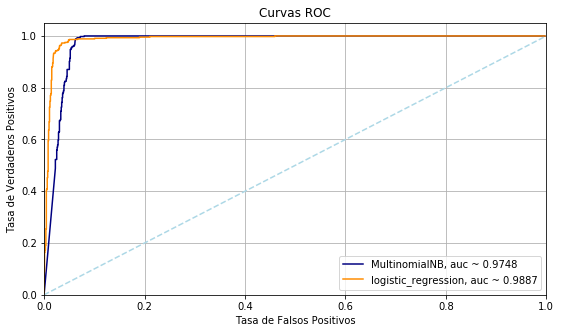

In [10]:
# Curvas ROC
plt.figure(figsize=(9,5))
plt.title('Curvas ROC')

plt.plot(fpr_spam_nb, tpr_spam_nb, color ='navy', label="MultinomialNB, auc ~ %0.4f" % auc_spam_nb)
plt.plot(fpr_spam_logit, tpr_spam_logit, color = 'darkorange', label="logistic_regression, auc ~ %0.4f" % auc_spam_logit)
# Estilo
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Precisión')

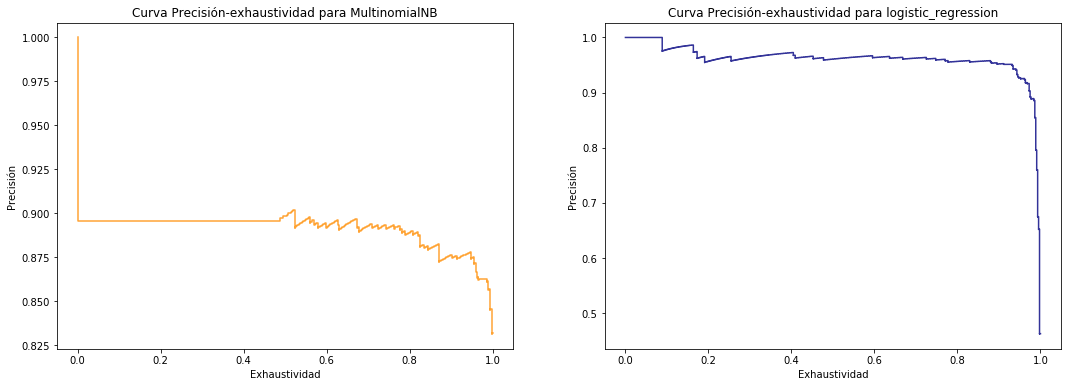

In [11]:
# Precisión-exhaustividad
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

gs = plt.GridSpec(1,2)
fig = plt.figure(figsize=(18,6))

# Precisión-Exhaustividad para MultinomialNB
precision_spam_nb, recall_spam_nb, _ = precision_recall_curve(test_spam_data[0:,-1], predicted_spam_nb[0:,1])

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
fig.add_subplot(gs[0,0]).step(recall_spam_nb, precision_spam_nb, color='darkorange', alpha=0.8,
         where='post')
plt.title("Curva Precisión-exhaustividad para MultinomialNB")
plt.xlabel('Exhaustividad')
plt.ylabel('Precisión')


# Precisión-Exhaustividad para logistic_regression
precision_spam_logit, recall_spam_logit, _ = precision_recall_curve(test_spam_data[0:,-1], predicted_spam_logit)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
fig.add_subplot(gs[0,1]).step(recall_spam_logit, precision_spam_logit, color='navy', alpha=0.8,
         where='post')
plt.title("Curva Precisión-exhaustividad para logistic_regression")
plt.xlabel('Exhaustividad')
plt.ylabel('Precisión')

### Conclusiones
Observamos que los clasificadores MultinomialNB y logistic_regression tiene rendimientos muy similares. La diferencia entre las áreas bajo la curvas ROC es muy pequeña y tal comportamiento se mantiene al variar la partición de los datos (el proceso de probar con otras particiones de los datos se omitió en esta presentación pues ejecutarlo toma mucho tiempo; el lector puede verificar por sí mismo/misma que cambiando el valor de random_state en train_test_split arriba genera resultados que cambian muy poco con respecto a lo mostrado arriba). 

## 2. Clasificación de tumores de seno
Como en el problema anterior, debemos entrenar un clasificador bayesiano ingenuo y un clasificador basado en regresión logística. Hacemos primeramente la carga de los datos. 

In [12]:
cancer_data_raw = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/breast-cancer-wisconsin.data", header=None).values[0:,1:]
print("Muestra de los datos originales:\n", cancer_data_raw[4:9])

Muestra de los datos originales:
 [[4 1 1 3 2 '1' 3 1 1 2]
 [8 10 10 8 7 '10' 9 7 1 4]
 [1 1 1 1 2 '10' 3 1 1 2]
 [2 1 2 1 2 '1' 3 1 1 2]
 [2 1 1 1 2 '1' 1 1 5 2]]


Recordemos que la base de datos de este problema tiene algunas entradas desconocidas para las variables independientes. En un trabajo anterior 
vimos que podíamos hacer 0 dichas entradas o bien reemplazarlas por la media de la columna en donde se encontraban. La diferencia entre estás 
dos propuestas es negligible (posiblemente porque son pocas las entradas desconocidas). En este problema reeemplazaremos las entradas 
desconocidas por 0.  
                              
 El preprocesamiento más importante de los datos en esta ocasión es cambiar las etiquetas (los valores de la variable respuesta) a 0 y 1. Esto es necesario principalmente para poder entrenar un modelo basado en regresión logística. 
 
 En la siguiente celda hacemos el preprocesamiento descrito aquí. En la subsiguiente celda hacemos una partición aleatoria en un conjunto de entrenamiento y otro de validación (con 70% y 30% de los datos, respectivamente).

In [13]:
#Sustituir valores desconocidos por 0 y cambiar las etiquetas por 0 y 1
n = len(cancer_data_raw)
l = len(cancer_data_raw[0])
cancer_data = np.ndarray(shape = (n,l))
type(cancer_data[0][0])

for i in range(0, n):
    for j in range(0, l-1):
        if cancer_data_raw[i][j] == '?':
            cancer_data[i][j] = 0
        else:
            cancer_data[i][j] = int(cancer_data_raw[i][j])
    cancer_data[i][-1] = int(cancer_data_raw[i][-1]/2 -1)

print("Muestra de los datos procesados:\n", cancer_data[4:9])

Muestra de los datos procesados:
 [[ 4.  1.  1.  3.  2.  1.  3.  1.  1.  0.]
 [ 8. 10. 10.  8.  7. 10.  9.  7.  1.  1.]
 [ 1.  1.  1.  1.  2. 10.  3.  1.  1.  0.]
 [ 2.  1.  2.  1.  2.  1.  3.  1.  1.  0.]
 [ 2.  1.  1.  1.  2.  1.  1.  1.  5.  0.]]


In [14]:
#Partición aleatoria del conjunto de datos, 70% para entrenamiento y 30% para validación
train_cancer_data, test_cancer_data = train_test_split(cancer_data, test_size = 0.30, random_state=0)
print("Número de instancias para entrenamiento:", len(train_cancer_data))
print("Número de instancias para validación:", len(test_cancer_data))

Número de instancias para entrenamiento: 489
Número de instancias para validación: 210


### 2. a) Entrenamiento de una clasificador bayesiano ingenuo
Para este problema elegimos el clasificador GaussianNB de sklearn. En un trabajo anterior vimos que este clasificador da buenos resultados para este problema. 

Ahora pasamos a entrenar dicho clasificador. Seguidamente, presentamos los scores sobre los conjuntos de entrenamiento y de validación. 

In [15]:
# Entrenamos un clasificador GaussianNB
gaussian_classifier = GaussianNB()
print(gaussian_classifier.fit(train_cancer_data[0:,:-1], train_cancer_data[0:,-1]))

GaussianNB(priors=None, var_smoothing=1e-09)


In [16]:
print("Score sobre el conjunto de entrenamiento:", gaussian_classifier.score(train_cancer_data[0:,:-1],train_cancer_data[0:,-1]))
print("Score sobre el conjunto de validación:", gaussian_classifier.score(test_cancer_data[0:,:-1],test_cancer_data[0:,-1]))

Score sobre el conjunto de entrenamiento: 0.9734151329243353
Score sobre el conjunto de validación: 0.9380952380952381


Ahora hacemos los calculos necesarios para posteriormente graficar las curvas ROC y de precisión-exhaustividad, y obtener el área bajo la curva ROC para GaussianNB. 

In [17]:
# Etiquetas predichas por el modelo de regresión logística para el conjunto de validación
predicted_cancer_nb = gaussian_classifier.predict_proba(test_cancer_data[0:,:-1])

# Calculo de las proporciones de falsos-positivos y verdaderos-positivos y del ǽrea bajo la curva
fpr_cancer_nb, tpr_cancer_nb, _ = metrics.roc_curve(test_cancer_data[0:,-1],  predicted_cancer_nb[0:,1])
auc_cancer_nb = metrics.roc_auc_score(test_cancer_data[0:,-1], predicted_cancer_nb[0:,1])

print("El área bajo la curva ROC para logistic_regression es =", auc_cancer_nb)

El área bajo la curva ROC para logistic_regression es = 0.9653333333333334


### 2. b) Entrenamiento de un clasificador con regresión logística
Ahora deseamos entrenar un modelo basado en nuestra implementación logistic_regression. Veamos qué valores del coeficiente de regularización $L_2$ dan el mejor modelo. 

In [18]:
# Crear un modelo basado en regresión logística
logit_reg2 = logistic_regression()

In [19]:
# Calcular scores para diferentes valores de lambda
lambds = np.concatenate((np.linspace(-0.01, 0.02, num=10),[0.05,0.08,0.1]))
i = 0
res2_train = np.zeros(13)
res2_test = np.zeros(13)

for lambd in lambds:
    logit_reg2.fit(train_cancer_data[0:,:-1], train_cancer_data[0:,-1], lambd)
    res2_train[i] = logit_reg2.score(train_cancer_data[0:,:-1],train_cancer_data[0:,-1])
    res2_test[i] = logit_reg2.score(test_cancer_data[0:,:-1],test_cancer_data[0:,-1])
    i += 1

Score máximo sobre conjunto de validación = 0.8761904761904762 , alcanzado para lambd = 0.009999999999999997


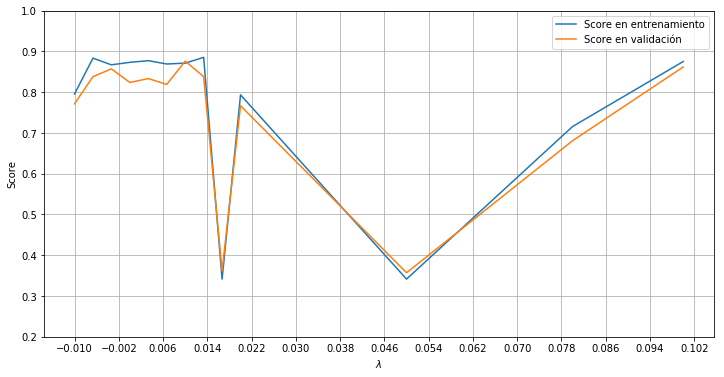

In [26]:
# Encontrar máximo score y lambda para el cual se alcanza
print("Score máximo sobre conjunto de validación =", res2_test.max(), ", alcanzado para lambd =", lambds[res2_test.argmax()])

#Graficar 
plt.figure(figsize=(12,6))
plt.plot(lambds, res2_train, label = "Score en entrenamiento")
plt.plot(lambds, res2_test, label = "Score en validación")
plt.xlabel("$\lambda$")
plt.ylabel("Score")
plt.ylim([0.2, 1.0])
plt.legend(loc = "upper right")
plt.xticks(np.arange(-0.01, 0.11, .008))
plt.grid(True)
plt.show()

Seleccionamos por lo tanto al modelo con factor de regularización $L_2$ igual a 0.009999999999999997. A continuación entrenamos dicho modelo y presentamos su score sobre los conjuntos de entrenamiento y validación.

In [21]:
# Entrenamiento del mejor modelo, lambd = 0.009999999999999997
chosen_cancer_logit = logistic_regression()
chosen_cancer_logit.fit(train_cancer_data[0:,:-1], train_cancer_data[0:,-1], 0.009999999999999997)

print("Score sobre el conjunto de entrenamiento:", chosen_cancer_logit.score(train_cancer_data[0:,:-1], train_cancer_data[0:,-1]))
print("Score sobre el conjunto de entrenamiento:", chosen_cancer_logit.score(test_cancer_data[0:,:-1], test_cancer_data[0:,-1]))

Score sobre el conjunto de entrenamiento: 0.8711656441717791
Score sobre el conjunto de entrenamiento: 0.8761904761904762


Ahora calculamos las tasas de falsos positivos y verdaderos positivos para más tarde presentar las curvas ROC y de precisión-exhaustividad.

In [22]:
# Etiquetas predichas por el modelo de regresión logística para el conjunto de validación
predicted_cancer_logit = chosen_cancer_logit.decision(test_cancer_data[0:,:-1])

# Calculo de las proporciones de falsos-positivos y verdaderos-positivos y del ǽrea bajo la curva
fpr_cancer_logit, tpr_cancer_logit, _ = metrics.roc_curve(test_cancer_data[0:,-1],  predicted_cancer_logit)
auc_cancer_logit = metrics.roc_auc_score(test_cancer_data[0:,-1], predicted_cancer_logit)

print("El área bajo la curva ROC para logistic_regression es =", auc_cancer_logit)

El área bajo la curva ROC para logistic_regression es = 0.924641975308642


### 2. c) Gráficas de rendimiento para GaussianNB y logistic_regression
Finalemente, presentamos las curvas ROC y de precisión-exhaustividad para los clasifcadors GaussianNB y logistic_regression en el problema de la clasificación de cáncer de seno. 

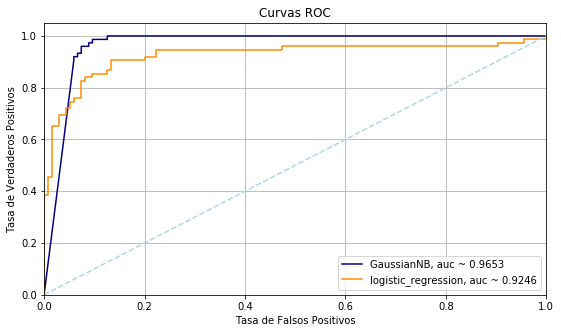

In [23]:
# ROCS
plt.figure(figsize=(9,5))
plt.title('Curvas ROC')

plt.plot(fpr_cancer_nb, tpr_cancer_nb, color ='navy', label="GaussianNB, auc ~ %0.4f" % auc_cancer_nb)
plt.plot(fpr_cancer_logit, tpr_cancer_logit, color = 'darkorange', label="logistic_regression, auc ~ %0.4f" % auc_cancer_logit)
# Estilo
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Precisión')

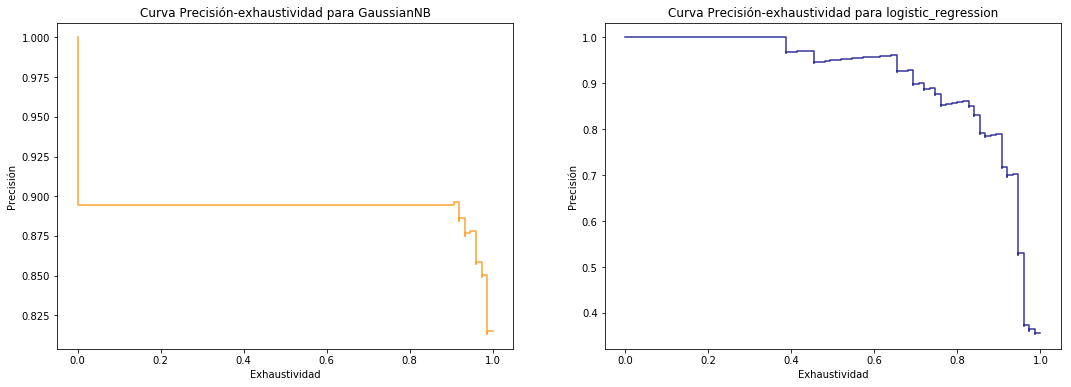

In [24]:
# Precisión-exhaustividad
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

gs = plt.GridSpec(1,2)
fig = plt.figure(figsize=(18,6))

# Precisión-Exhaustividad para GausssianB
precision_cancer_nb, recall_cancer_nb, _ = precision_recall_curve(test_cancer_data[0:,-1], predicted_cancer_nb[0:,1])

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
fig.add_subplot(gs[0,0]).step(recall_cancer_nb, precision_cancer_nb, color='darkorange', alpha=0.8,
         where='post')
plt.title("Curva Precisión-exhaustividad para GaussianNB")
plt.xlabel('Exhaustividad')
plt.ylabel('Precisión')


# Precisión-Exhaustividad para logistic_regression
precision_cancer_logit, recall_cancer_logit, _ = precision_recall_curve(test_cancer_data[0:,-1], predicted_cancer_logit)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
fig.add_subplot(gs[0,1]).step(recall_cancer_logit, precision_cancer_logit, color='navy', alpha=0.8,
         where='post')
plt.title("Curva Precisión-exhaustividad para logistic_regression")
plt.xlabel('Exhaustividad')
plt.ylabel('Precisión')

### Conclusiones
En este problema el rendimiento del clasificador bayesiano ingenuo tiene un rendimiento considerablemente mejor que el clasificador generado  con regresión logística. Es posible que esto se deba a que los valores de los atributos, a pesar de ser números, tengan una naturaleza categórica ya que en realidad dichos valores sólo toman valores enteros entre 0 y 10. Así, una segunda propuesta sería entrenar un modelo po regresión logística pero considerando que los valores de los atributos son categóricos.